### pandas 라이브러리와 탐색적 데이터 분석 과정 익히기

> 다양한 데이터 분석 케이스를 통해 데이터 분석과 pandas 라이브러리 활용에 대해 익히보기로 합니다.

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="4em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석</font><br>

### 전체 판매 프로세스
1. 해당 쇼핑몰에 중소업체가 계약을 맺고
2. 중소업체가 해당 쇼핑몰에 직접 상품을 올리고
2. 고객이 구매하면, 중소업체가 Olist가 제공하는 물류 파트너를 활용해서 배송을 하고,
3. 고객이 상품을 받으면, 고객에게 이메일 survey 가 전송되고,
4. 고객이 이메일 survey 에 별점과 커멘트를 남겨서 제출하게 됨
    
### 데이터 출처
- 브라질에서 가장 큰 백화점의 이커머스 쇼핑몰 (https://olist.com/)
  - 2016년도부터 2018년도 9월까지의 100k 개의 구매 데이터 정보
  - 구매 상태, 가격, 지불수단, 물류 관련, 리뷰관련, 상품 정보, 구매자 지역 관련 정보

### 주요 질문(탐색하고자 하는 질문 리스트)
- 얼마나 많은 고객이 있는가?
- 고객은 어디에 주로 사는가?
- 고객은 주로 어떤 지불방법을 사용하는가?
- 평균 거래액은 얼마일까?
- 일별, 주별, 월별 판매 트렌드는?
- **어떤 카테고리가 가장 많은 상품이 팔렸을까?**
- 평균 배송 시간은?
</div>

### 1. 카테고리별 판매 분석

In [1]:
import pandas as pd
PATH = "00_data/"

In [2]:
products = pd.read_csv(PATH + "olist_products_dataset.csv", encoding='utf-8-sig')
customers = pd.read_csv(PATH + "olist_customers_dataset.csv", encoding='utf-8-sig')
geolocation = pd.read_csv(PATH + "olist_geolocation_dataset.csv", encoding='utf-8-sig')
order_items = pd.read_csv(PATH + "olist_order_items_dataset.csv", encoding='utf-8-sig')
payments = pd.read_csv(PATH + "olist_order_payments_dataset.csv", encoding='utf-8-sig')
reviews = pd.read_csv(PATH + "olist_order_reviews_dataset.csv", encoding='utf-8-sig')
orders = pd.read_csv(PATH + "olist_orders_dataset.csv", encoding='utf-8-sig')
sellers = pd.read_csv(PATH + "olist_sellers_dataset.csv", encoding='utf-8-sig')
category_name = pd.read_csv(PATH + "product_category_name_translation.csv", encoding='utf-8-sig')

#### products 와 category_name 합치기

In [3]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
products_category = pd.merge(products, category_name, on='product_category_name')

In [6]:
products_category

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


#### 필요한 컬럼만 가져오기

In [7]:
products_category_only = products_category[['product_id', 'product_category_name_english']].copy()
products_category_only.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


In [9]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
products_category_order = pd.merge(products_category_only, order_items, on='product_id')
products_category_order.head()

,product_id,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13
4,0d009643171aee696f4733340bc2fdd0,perfumery,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48


### 2. 카테고리별 거래 건수 확인하기
1. 카테고리 이름으로 grouping 한다: products_category_order.groupby('product_category_name_english')
2. grouping 할 때 order는 거래액이 아니라 거래건수로 count 를 한다: .aggregate({'order_id':'count'})
   - .aggregate() 또는 .agg() 를 사용
2. 거래건수로 count 한 값의 컬럼명을 order_count 로 바꾼다: .rename(columns={'order_id':'order_count'})

### 참고: aggregate 함수

In [12]:
import pandas as pd
df = pd.DataFrame({
    "미국": [2.1, 2.2, 2.3],
    "한국": [0.4, 0.5, 0.45],
    "중국": [10, 13, 15]    
})
df

,미국,한국,중국
0,2.1,0.40,10
1,2.2,0.50,13
2,2.3,0.45,15


#### 다양한 함수 사용하기
- 주요 함수: sum, min, max, mean, std, count 등

In [14]:
df.agg(['sum', 'min'])

,미국,한국,중국
sum,6.6,1.35,38
min,2.1,0.40,10


#### 특정 컬럼만 함수 적용해서 가져오기

In [15]:
df.agg({'미국' : 'count', '한국': 'sum'})

미국    3.00
한국    1.35
dtype: float64

#### 행에 대해 함수 적용하기

In [16]:
df.agg("mean", axis="columns")

0    4.166667
1    5.233333
2    5.916667
dtype: float64

#### 특정 컬럼만 grouping 하고, 함수 적용해서 가져오기

In [17]:
df = pd.DataFrame({
    "년도": [2000, 2010, 2020, 2000, 2000, 2020],    
    "미국": [2.1, 2.2, 2.3, 3.1, 4.1, 5.1],
    "한국": [0.4, 0.5, 0.45, 0.7, 0.9, 1.2],
    "중국": [10, 13, 15, 12, 45, 56]    
})
df

,년도,미국,한국,중국
0,2000,2.1,0.40,10
1,2010,2.2,0.50,13
2,2020,2.3,0.45,15
3,2000,3.1,0.70,12
4,2000,4.1,0.90,45
5,2020,5.1,1.20,56


In [18]:
df.groupby('년도').sum()

,미국,한국,중국
년도,,,
2000,9.3,2.00,67
2010,2.2,0.50,13
2020,7.4,1.65,71


In [19]:
df.groupby('년도').agg({'미국':'sum', '한국':'mean'})

,미국,한국
년도,,
2000,9.3,0.666667
2010,2.2,0.500000
2020,7.4,0.825000


### 카테고리별 거래 건수 확인하기

In [20]:
products_category_order = products_category_order.groupby('product_category_name_english').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'})

In [21]:
products_category_order.head()

,order_count
product_category_name_english,
agro_industry_and_commerce,212
air_conditioning,297
art,209
arts_and_craftmanship,24
audio,364


In [22]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

- 참고: https://nbviewer.jupyter.org/gist/santosjorge/f3b07b2be8094deea8c6

In [23]:
products_category_order.iplot(kind='bar', theme='white')

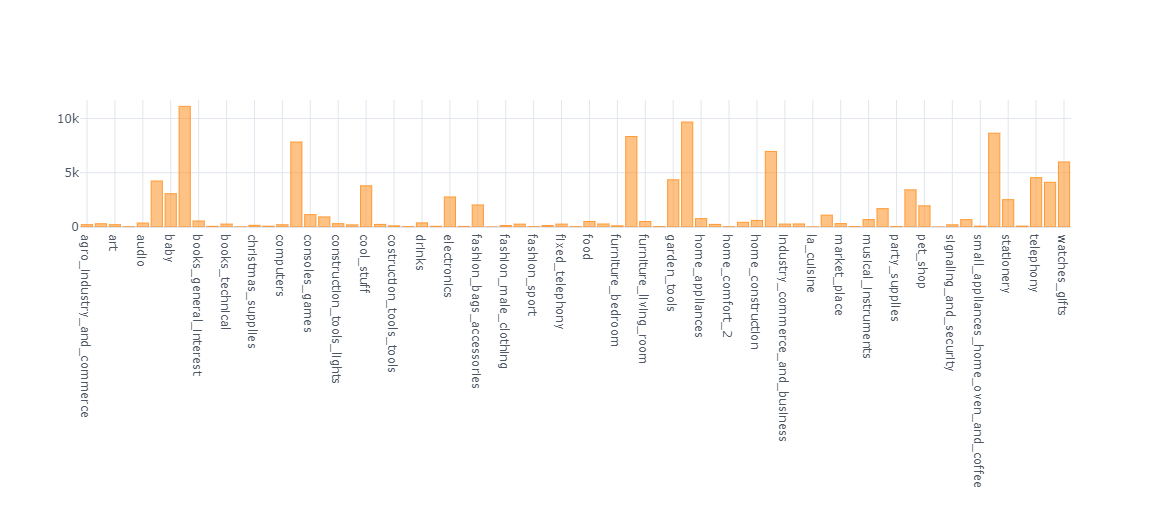

### plotly Ficture 객체로 그래프 그려보기

#### 카테고리별 거래건수로 정렬하기

In [24]:
products_category_order = products_category_order.sort_values(by='order_count',ascending=False)

In [25]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=products_category_order.index, 
        y=products_category_order['order_count']
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>The number of Order per Category in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Oct. 2016 to Sep. 2018",
            "showticklabels":True,
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "The number of Order"
        },
        "template":'plotly_white'
    }
)
fig.show()

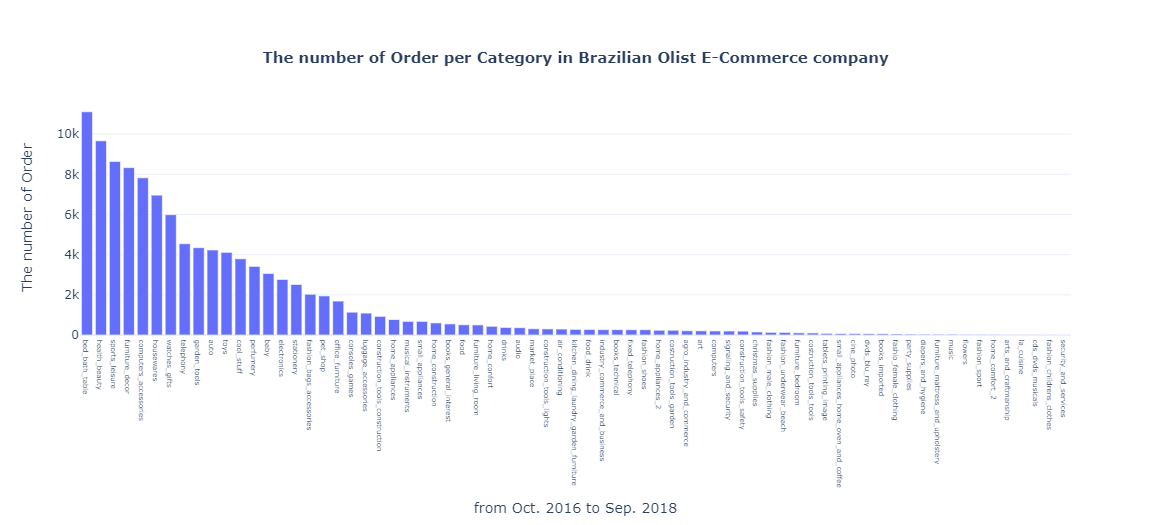

#### 주요 카테고리만 확인하기

In [28]:
products_category_order = products_category_order[products_category_order['order_count'] > 1000]

In [29]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=products_category_order.index, 
        y=products_category_order['order_count']
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>The number of Order per Category in Brazilian Olist E-Commerce company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "from Oct. 2016 to Sep. 2018",
            "showticklabels":True,
            "tickfont": {
                "size": 7                
            }
        },
        "yaxis": {
            "title": "The number of Order"
        },
        "template":'plotly_white'
    }
)
fig.show()

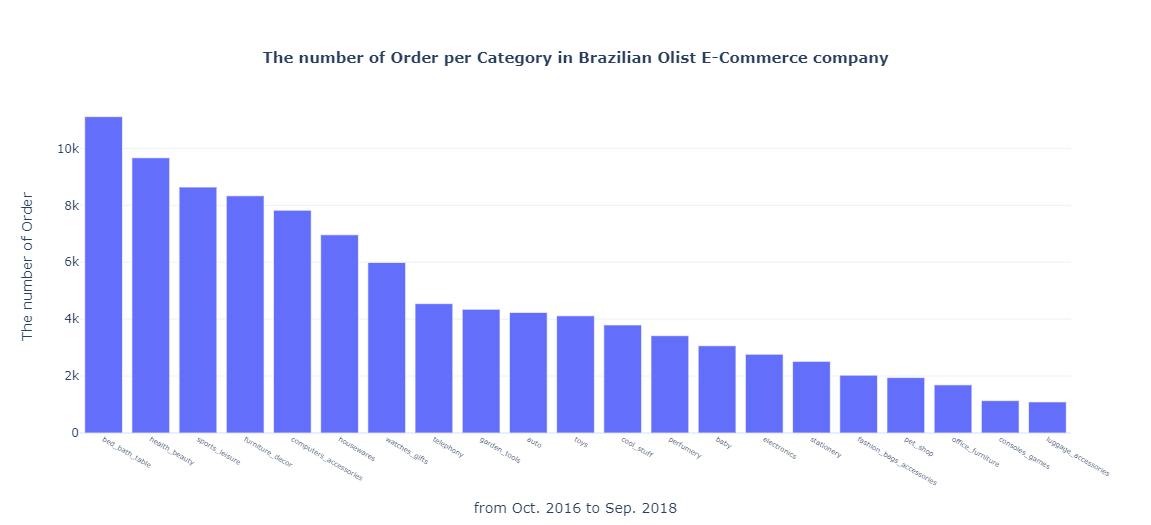